In [1]:
import pandas as pd
import openpyxl
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Excel file to check its contents
file_path = '20_21_season.xlsx'
teams_data = pd.read_excel(file_path, sheet_name='Teams')
teams_data

,TEAM,MATCH,MATCH DATE,DISTANCE COVERED - TOTAL DISTANCE,"DISTANCE COVERED - DISTANCE ON SPEED UP TO 0,2 M/S","DISTANCE COVERED - DISTANCE ON SPEED 0,21 - 2 M/S","DISTANCE COVERED - DISTANCE ON SPEED 2,01 - 4 M/S","DISTANCE COVERED - DISTANCE ON SPEED 4,01 - 5,5 M/S","DISTANCE COVERED - DISTANCE ON SPEED 5,51 - 7 M/S",DISTANCE COVERED - DISTANCE ON SPEED OVER 7 M/S,"DISTANCE COVERED - NO. OF ACCELERATIONS (5,5 - 7)",DISTANCE COVERED - NO. OF ACCELERATIONS (>7),DISTANCE COVERED - MAXIMAL SPEED
0,Rizespor,Rizespor 1:2 Fenerbahce,11.09.20,1.117840e+05,279.0000,4.216800e+04,4.353700e+04,16792.0000,7481.0000,1535.0000,528.0000,90.0000,8.1200
1,Rizespor,Kasimpasa 2:0 Rizespor,20.09.20,1.141530e+05,276.0000,3.996100e+04,4.499800e+04,19583.0000,7853.0000,1495.0000,535.0000,100.0000,8.2100
2,Rizespor,Rizespor 1:1 Alanyaspor,27.09.20,1.093810e+05,355.0000,4.260500e+04,4.192800e+04,16425.0000,6991.0000,1098.0000,548.0000,66.0000,8.2000
3,Rizespor,Rizespor 1:0 Kayserispor,01.11.20,1.103550e+05,232.0000,4.384500e+04,4.406100e+04,15360.0000,5918.0000,969.0000,447.0000,62.0000,7.8700
4,Rizespor,Hatayspor 2:2 Rizespor,22.11.20,1.143060e+05,297.0000,4.150100e+04,4.426000e+04,17930.0000,8198.0000,2159.0000,542.0000,112.0000,8.2400
...,...,...,...,...,...,...,...,...,...,...,...,...,...
709,Konyaspor,Konyaspor 5:1 Fatih Karagumruk,02.05.21,1.080850e+05,332.0000,4.158700e+04,3.941600e+04,17449.0000,7855.0000,1469.0000,596.0000,62.0000,8.1100
710,Konyaspor,Goztepe 0:1 Konyaspor,08.05.21,1.094000e+05,320.0000,3.855500e+04,4.208500e+04,18700.0000,8391.0000,1372.0000,614.0000,76.0000,7.9600
711,Konyaspor,Antalyaspor 0:0 Konyaspor,15.05.21,1.097030e+05,297.0000,4.092800e+04,4.307600e+04,16551.0000,7605.0000,1278.0000,536.0000,63.0000,7.9700
712,Konyaspor,On average,27.09.20 - 15.05.21,1.121889e+05,328.5135,4.163273e+04,4.278186e+04,18370.1892,7726.1892,1373.4865,530.1081,80.1081,8.0935


In [2]:
teams_data.columns = [
    'Team', 'Match', 'Match Date', 'Total Distance Covered', 
    'Distance Covered Speed 0-0.2 m/s', 'Distance Covered Speed 0.21-2 m/s', 
    'Distance Covered Speed 2.01-4 m/s', 'Distance Covered Speed 4.01-5.5 m/s', 
    'Distance Covered Speed 5.51-7 m/s', 'Distance Covered Speed >7 m/s', 
    'No. of Accelerations 5.5-7 m/s²', 'No. of Accelerations >7 m/s²', 
    'Maximal Speed'
]

In [3]:
print("DataFrame Information:")
teams_data.info()
teams_data['Match Date'] = pd.to_datetime(teams_data['Match Date'], format='%d.%m.%y', errors='coerce')


DataFrame Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 714 entries, 0 to 713
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Team                                 714 non-null    object 
 1   Match                                714 non-null    object 
 2   Match Date                           714 non-null    object 
 3   Total Distance Covered               714 non-null    float64
 4   Distance Covered Speed 0-0.2 m/s     714 non-null    float64
 5   Distance Covered Speed 0.21-2 m/s    714 non-null    float64
 6   Distance Covered Speed 2.01-4 m/s    714 non-null    float64
 7   Distance Covered Speed 4.01-5.5 m/s  714 non-null    float64
 8   Distance Covered Speed 5.51-7 m/s    714 non-null    float64
 9   Distance Covered Speed >7 m/s        714 non-null    float64
 10  No. of Accelerations 5.5-7 m/s²      714 non-null    float64
 11  No. of Ac

In [4]:
print("\nSummary Statistics:")
print(teams_data.describe())


Summary Statistics:
                          Match Date  Total Distance Covered  \
count                            672            7.140000e+02   
mean   2021-01-27 20:08:34.285714176            2.110883e+05   
min              2020-09-11 00:00:00            6.725400e+04   
25%              2020-12-12 00:00:00            1.078530e+05   
50%              2021-01-31 00:00:00            1.107100e+05   
75%              2021-04-04 00:00:00            1.138085e+05   
max              2021-05-15 00:00:00            4.363707e+06   
std                              NaN            5.937351e+05   

       Distance Covered Speed 0-0.2 m/s  Distance Covered Speed 0.21-2 m/s  \
count                        714.000000                       7.140000e+02   
mean                         676.494403                       7.899174e+04   
min                          213.000000                       2.485700e+04   
25%                          315.000000                       4.028250e+04   
50%         

In [5]:
print("\nMissing Values:")
print(teams_data.isnull().sum())
teams_data = teams_data[~teams_data['Match'].str.contains("On average|Total")] 
# I forgot to remove these


Missing Values:
Team                                    0
Match                                   0
Match Date                             42
Total Distance Covered                  0
Distance Covered Speed 0-0.2 m/s        0
Distance Covered Speed 0.21-2 m/s       0
Distance Covered Speed 2.01-4 m/s       0
Distance Covered Speed 4.01-5.5 m/s     0
Distance Covered Speed 5.51-7 m/s       0
Distance Covered Speed >7 m/s           0
No. of Accelerations 5.5-7 m/s²         0
No. of Accelerations >7 m/s²            0
Maximal Speed                           0
dtype: int64


In [6]:
numerical_cols = teams_data.select_dtypes(include=['float64', 'int64']).columns
numerical_cols

Index(['Total Distance Covered', 'Distance Covered Speed 0-0.2 m/s',
       'Distance Covered Speed 0.21-2 m/s',
       'Distance Covered Speed 2.01-4 m/s',
       'Distance Covered Speed 4.01-5.5 m/s',
       'Distance Covered Speed 5.51-7 m/s', 'Distance Covered Speed >7 m/s',
       'No. of Accelerations 5.5-7 m/s²', 'No. of Accelerations >7 m/s²',
       'Maximal Speed'],
      dtype='object')

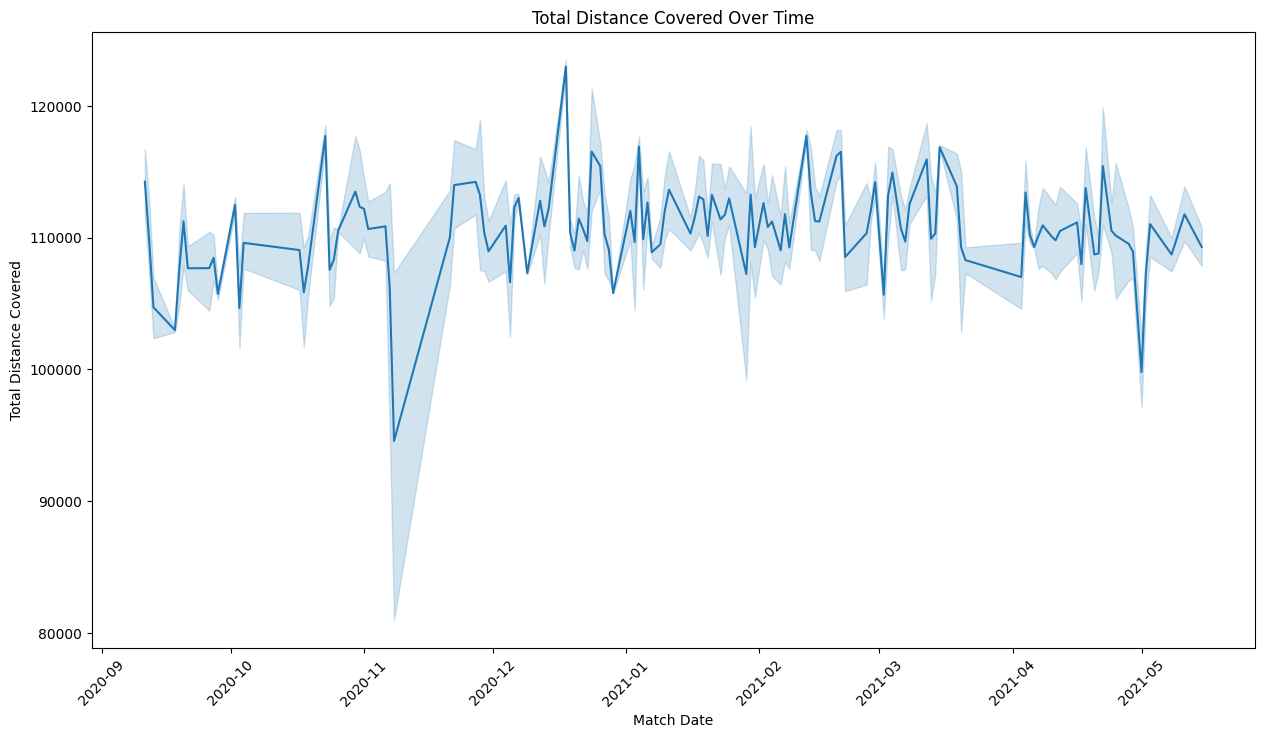

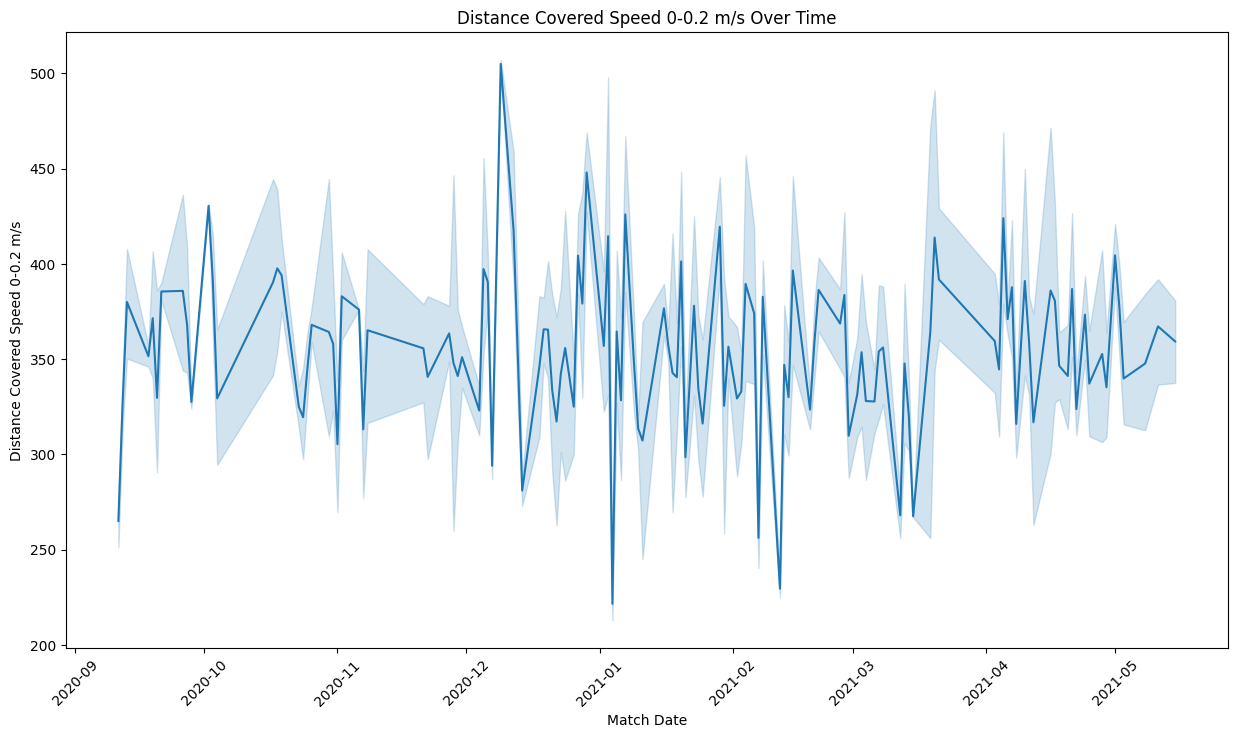

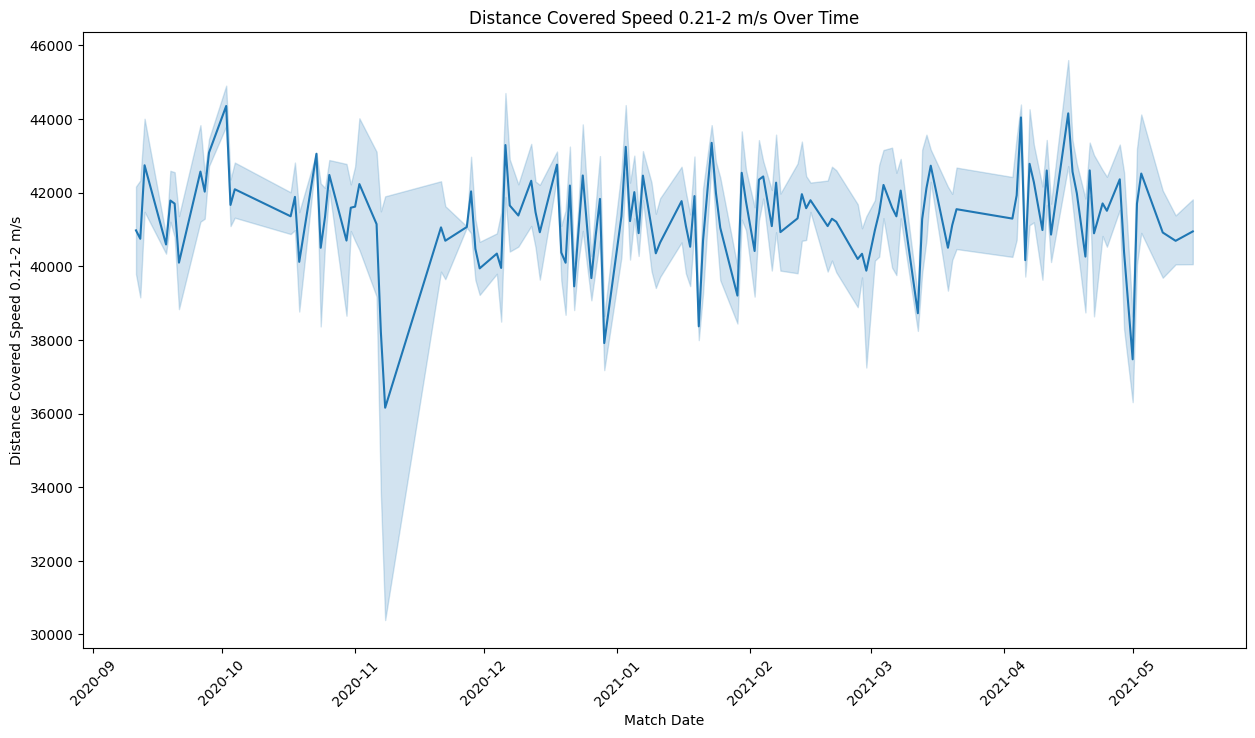

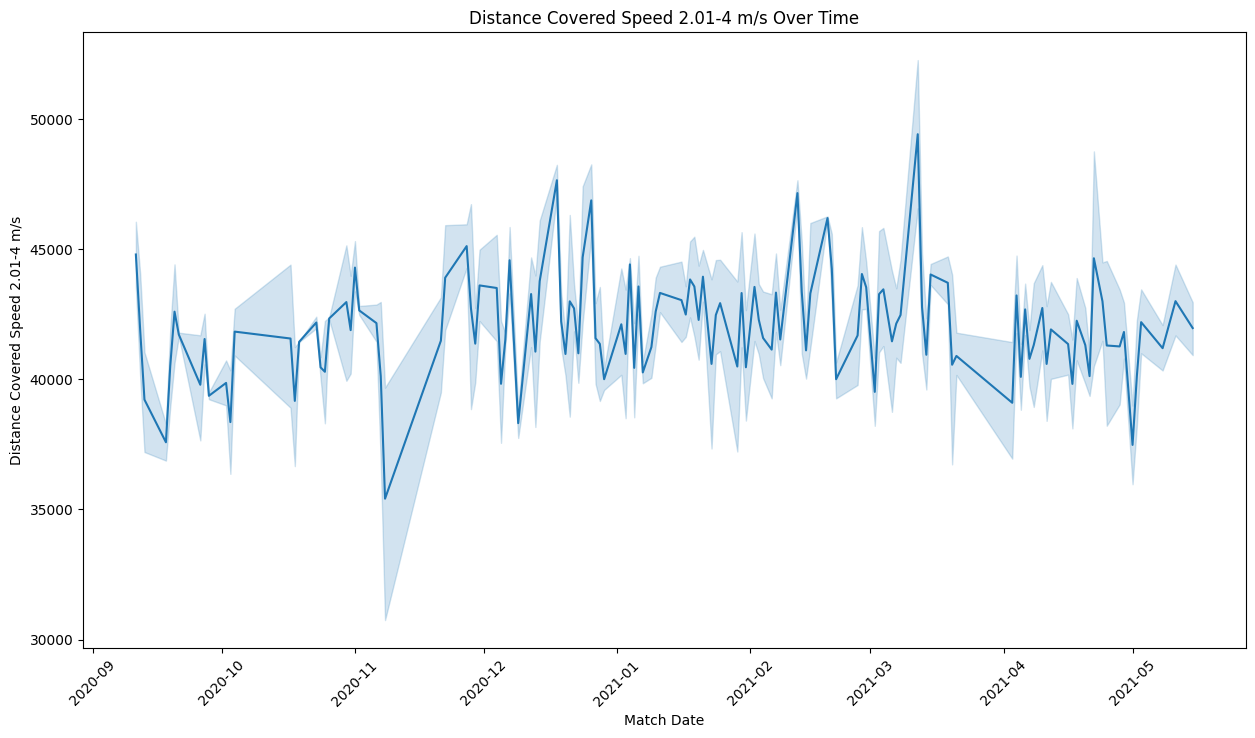

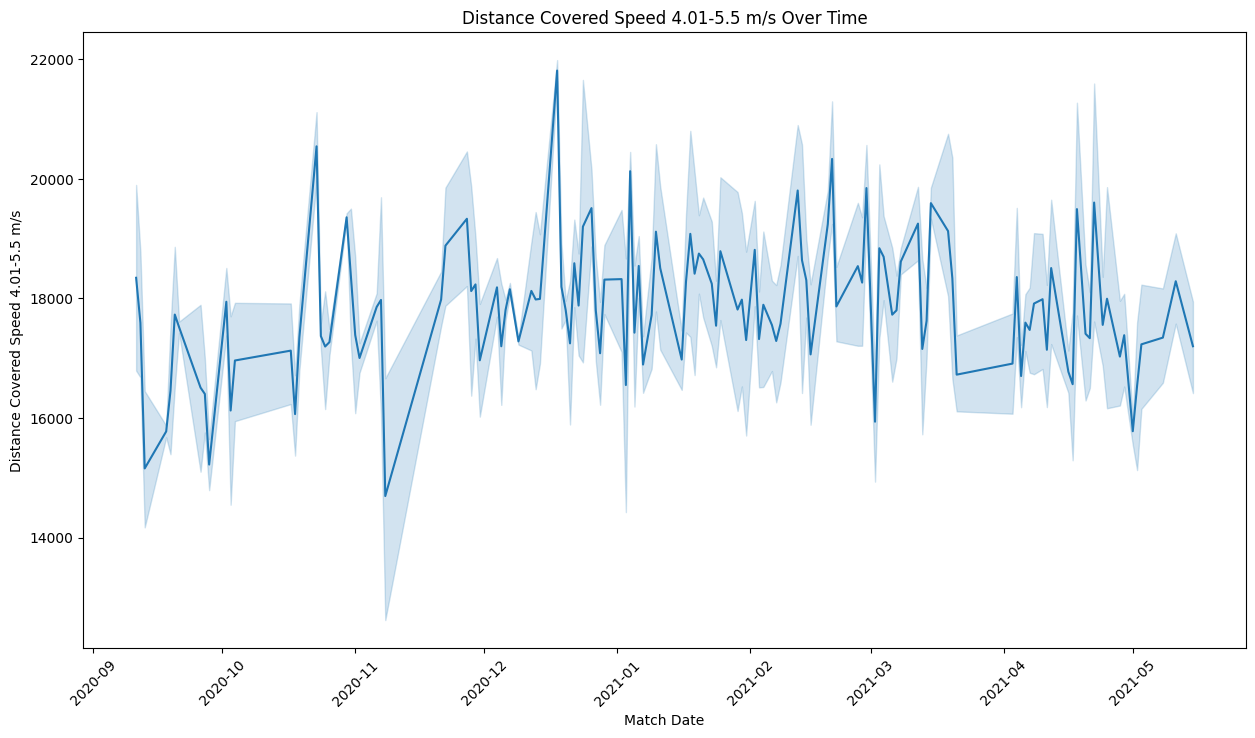

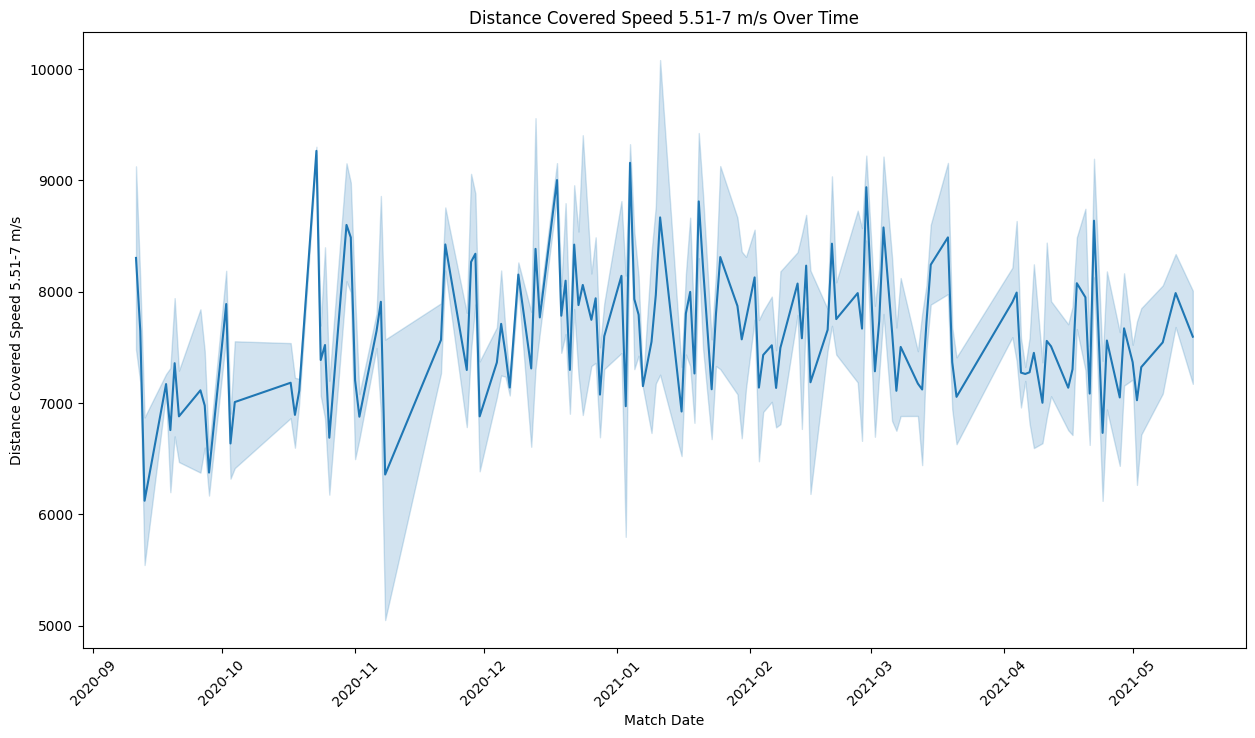

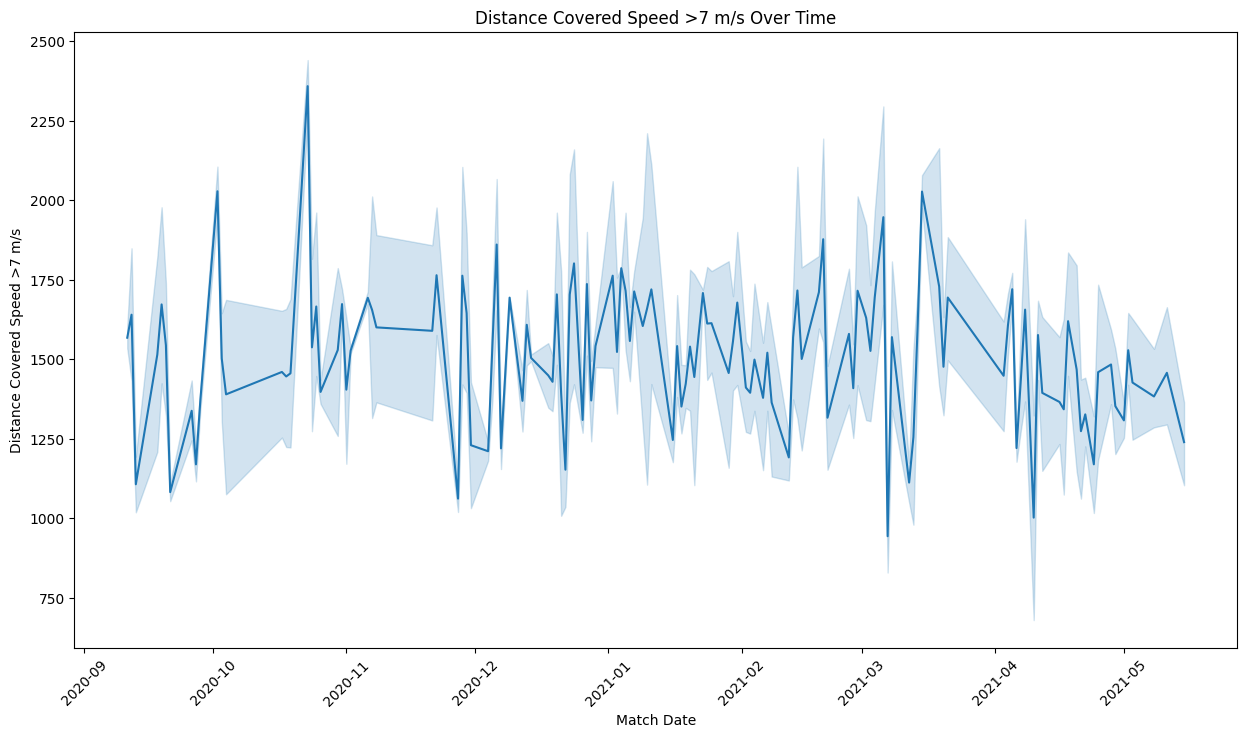

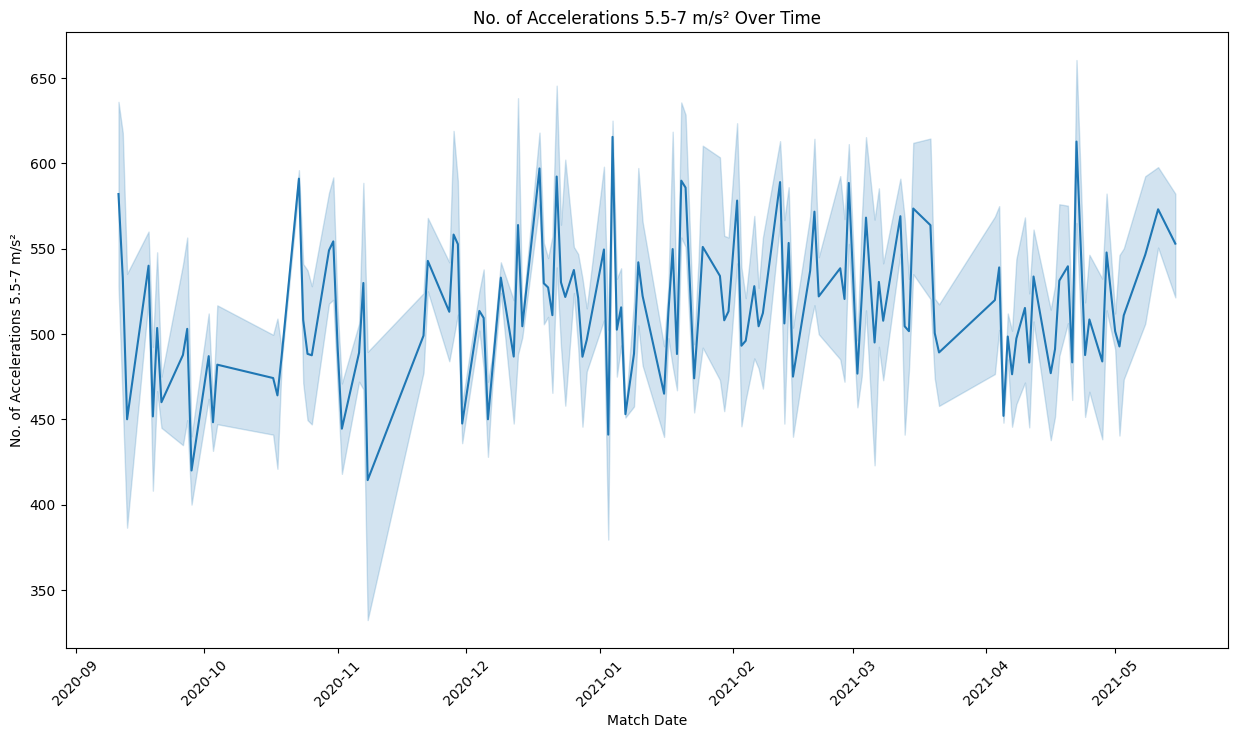

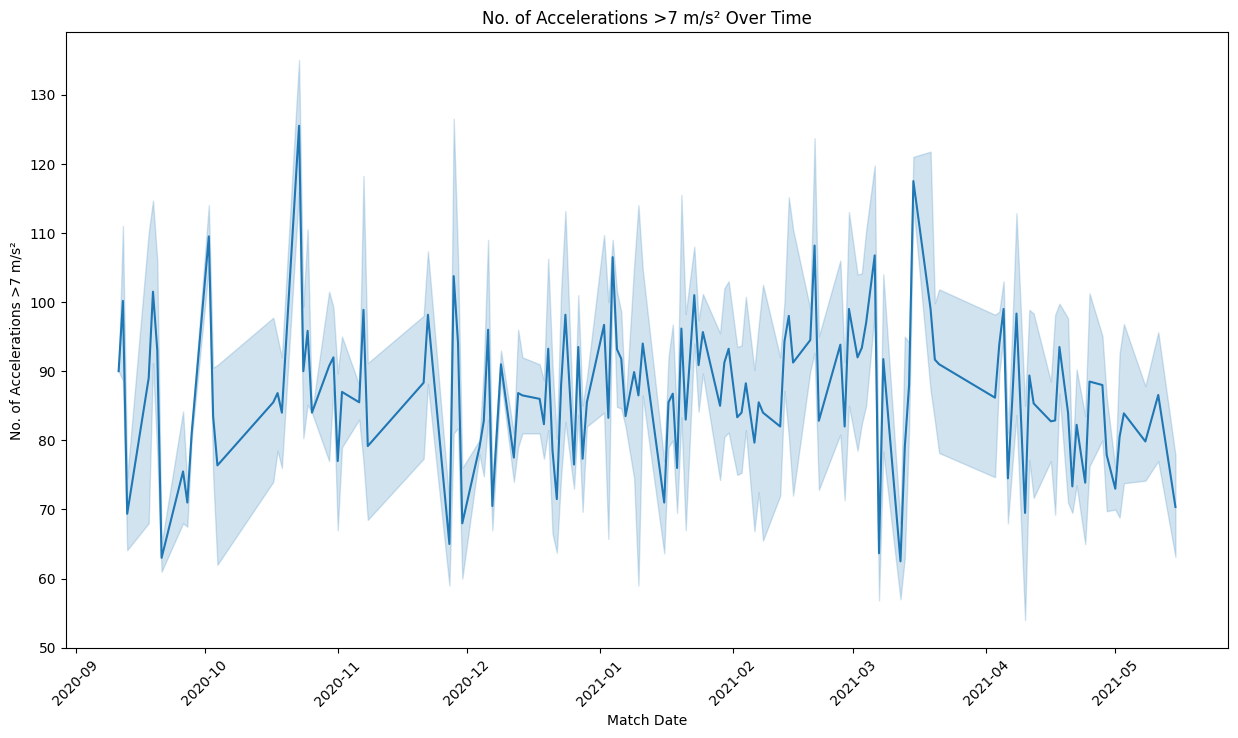

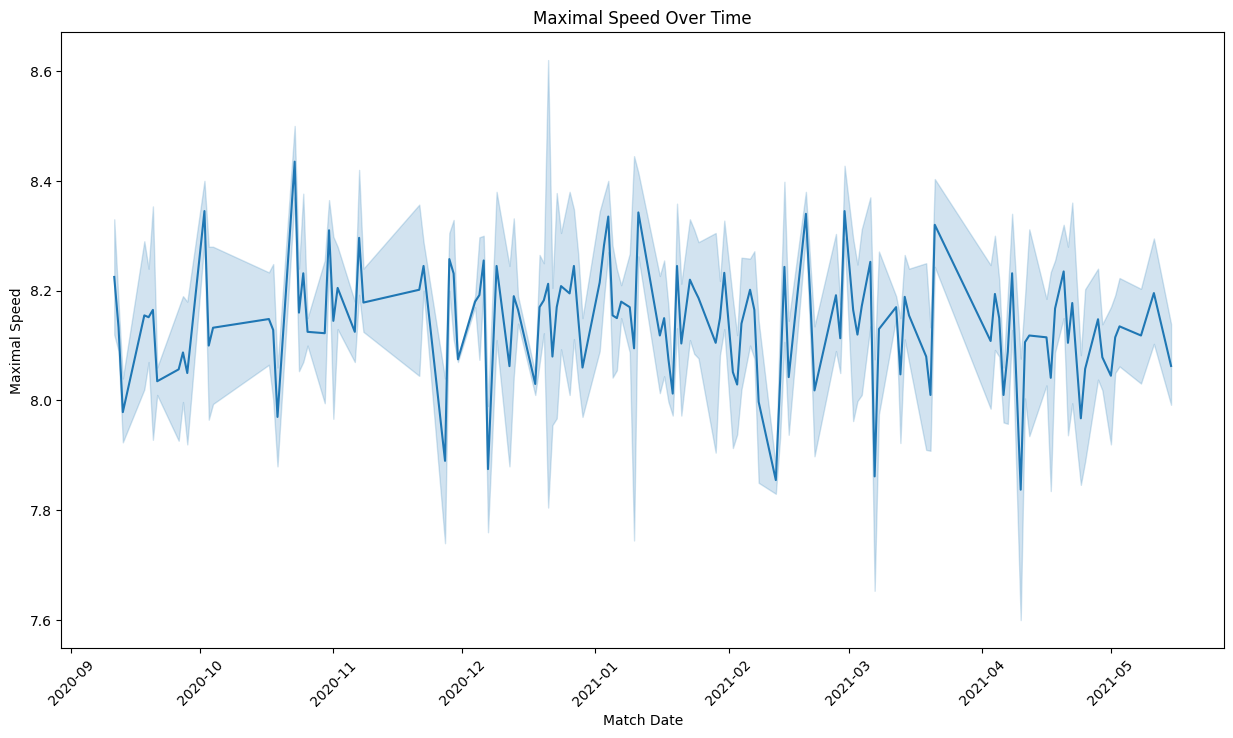

In [7]:
for col in numerical_cols:
    plt.figure(figsize=(15, 8))
    sns.lineplot(data=teams_data, x='Match Date', y=col)
    plt.title(f'{col} Over Time')
    plt.xlabel('Match Date')
    plt.ylabel(col)
    plt.xticks(rotation=45)
    plt.show()


In [8]:
#!pip install plotly.express
import plotly.express as px
from plotly.offline import plot

for col in numerical_cols:
    fig = px.line(
        teams_data, 
        x='Match Date', 
        y=col, 
        color='Team', 
        title=f'{col} Over Time',
        labels={
            'Match Date': 'Match Date',
            col: col
        }
    )
    fig.update_layout(xaxis_title='Match Date', yaxis_title=col)
    plot(fig)  # Use plotly.offline.plot to render the plot in the browser


In [9]:
import plotly.io as pio
import re
def sanitize_filename(filename):
    return re.sub(r'[\\/*?:"<>|]', "", filename)

# Generate interactive plots for each numerical column and save them as HTML
for col in numerical_cols:
    fig = px.line(
        teams_data, 
        x='Match Date', 
        y=col, 
        color='Team', 
        title=f'{col} Over Time',
        labels={
            'Match Date': 'Match Date',
            col: col
        }
    )
    fig.update_layout(xaxis_title='Match Date', yaxis_title=col)
    # Sanitize the file name
    sanitized_filename = sanitize_filename(f'{col}_over_time.html')
    # Save each plot as an HTML file
    pio.write_html(fig, file=sanitized_filename, auto_open=True)

print("Plots have been saved as HTML files.")



Plots have been saved as HTML files.


In [12]:
import os

ranking = [
    'Besiktas', 'Galatasaray', 'Fenerbahçe', 'Trabzonspor',
    'Sivasspor', 'Hatayspor', 'Alanyaspor', 'Fatih Karagümrük',
    'Gaziantep Fk', 'Göztepe', 'Konyaspor', 'Basaksehir',
    'Çaykur Rizespor', 'Kasimpasa', 'Yeni Malatyaspor', 'Antalyaspor',
    'Kayserispor', 'Bb Erzurumspor', 'Mke Ankaragücü', 'Gençlerbirligi',
    'Denizlispor'
]


ranking = [team.strip().upper() for team in ranking]

# Split the ranking into four groups
group_size = (len(ranking) + 3) // 4  # Ensure all teams are included
groups = [ranking[i:i + group_size] for i in range(0, len(ranking), group_size)]

# Directory to save the plots
output_dir = 'team_plots'
os.makedirs(output_dir, exist_ok=True)

# Generate static plots for each group
for group_idx, group in enumerate(groups):
    group_data = teams_data[teams_data['Team'].isin(group)]
    
    for col in numerical_cols:
        plt.figure(figsize=(15, 8))
        has_data = False
        for team in group:
            team_data = group_data[group_data['Team'] == team]
            if not team_data.empty:  # Ensure there is data to plot
                plt.plot(team_data['Match Date'], team_data[col], label=team)
                has_data = True
        
        if has_data:
            plt.title(f'{col} Over Time - Group {group_idx + 1}')
            plt.xlabel('Match Date')
            plt.ylabel(col)
            plt.legend()
            plt.xticks(rotation=45)
            # Save each plot as an image file
            sanitized_col = re.sub(r'[\\/*?:"<>|]', "", col)
            plt.savefig(os.path.join(output_dir, f'{sanitized_col}_group_{group_idx + 1}.png'))
            plt.close()
        else:
            print(f"No data available for {col} in Group {group_idx + 1}")

print(f"Plots have been saved in the '{output_dir}' directory.")


No data available for Total Distance Covered in Group 1
No data available for Distance Covered Speed 0-0.2 m/s in Group 1
No data available for Distance Covered Speed 0.21-2 m/s in Group 1
No data available for Distance Covered Speed 2.01-4 m/s in Group 1
No data available for Distance Covered Speed 4.01-5.5 m/s in Group 1
No data available for Distance Covered Speed 5.51-7 m/s in Group 1
No data available for Distance Covered Speed >7 m/s in Group 1
No data available for No. of Accelerations 5.5-7 m/s² in Group 1
No data available for No. of Accelerations >7 m/s² in Group 1
No data available for Maximal Speed in Group 1
No data available for Total Distance Covered in Group 2
No data available for Distance Covered Speed 0-0.2 m/s in Group 2
No data available for Distance Covered Speed 0.21-2 m/s in Group 2
No data available for Distance Covered Speed 2.01-4 m/s in Group 2
No data available for Distance Covered Speed 4.01-5.5 m/s in Group 2
No data available for Distance Covered Speed 5

C:\Users\emanu\AppData\Local\Temp\ipykernel_22512\1410891642.py:28: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.



<Figure size 1500x800 with 0 Axes>

<Figure size 1500x800 with 0 Axes>

<Figure size 1500x800 with 0 Axes>

<Figure size 1500x800 with 0 Axes>

<Figure size 1500x800 with 0 Axes>

<Figure size 1500x800 with 0 Axes>

<Figure size 1500x800 with 0 Axes>

<Figure size 1500x800 with 0 Axes>

<Figure size 1500x800 with 0 Axes>

<Figure size 1500x800 with 0 Axes>

<Figure size 1500x800 with 0 Axes>

<Figure size 1500x800 with 0 Axes>

<Figure size 1500x800 with 0 Axes>

<Figure size 1500x800 with 0 Axes>

<Figure size 1500x800 with 0 Axes>

<Figure size 1500x800 with 0 Axes>

<Figure size 1500x800 with 0 Axes>

<Figure size 1500x800 with 0 Axes>

<Figure size 1500x800 with 0 Axes>

<Figure size 1500x800 with 0 Axes>

<Figure size 1500x800 with 0 Axes>

<Figure size 1500x800 with 0 Axes>

<Figure size 1500x800 with 0 Axes>

<Figure size 1500x800 with 0 Axes>

<Figure size 1500x800 with 0 Axes>

<Figure size 1500x800 with 0 Axes>

<Figure size 1500x800 with 0 Axes>

<Figure size 1500x800 with 0 Axes>

<Figure size 1500x800 with 0 Axes>

<Figure size 1500x800 with 0 Axes>

<Figure size 1500x800 with 0 Axes>

<Figure size 1500x800 with 0 Axes>

<Figure size 1500x800 with 0 Axes>

<Figure size 1500x800 with 0 Axes>

<Figure size 1500x800 with 0 Axes>

<Figure size 1500x800 with 0 Axes>

<Figure size 1500x800 with 0 Axes>

<Figure size 1500x800 with 0 Axes>

<Figure size 1500x800 with 0 Axes>

<Figure size 1500x800 with 0 Axes>

In [15]:
ranking

['BESIKTAS',
 'GALATASARAY',
 'FENERBAHÇE',
 'TRABZONSPOR',
 'SIVASSPOR',
 'HATAYSPOR',
 'ALANYASPOR',
 'FATIH KARAGÜMRÜK',
 'GAZIANTEP FK',
 'GÖZTEPE',
 'KONYASPOR',
 'BASAKSEHIR',
 'ÇAYKUR RIZESPOR',
 'KASIMPASA',
 'YENI MALATYASPOR',
 'ANTALYASPOR',
 'KAYSERISPOR',
 'BB ERZURUMSPOR',
 'MKE ANKARAGÜCÜ',
 'GENÇLERBIRLIGI',
 'DENIZLISPOR']

In [11]:
import os

ranking = [
    'Besiktas', 'Galatasaray', 'Fenerbahçe', 'Trabzonspor',
    'Sivasspor', 'Hatayspor', 'Alanyaspor', 'Fatih Karagümrük',
    'Gaziantep Fk', 'Göztepe', 'Konyaspor', 'Basaksehir',
    'Çaykur Rizespor', 'Kasimpasa', 'Yeni Malatyaspor', 'Antalyaspor',
    'Kayserispor', 'Bb Erzurumspor', 'Mke Ankaragücü', 'Gençlerbirligi',
    'Denizlispor'
]


ranking = [team.strip().upper() for team in ranking]

# Split the ranking into four groups
group_size = (len(ranking) + 3) // 4  # Ensure all teams are included
groups = [ranking[i:i + group_size] for i in range(0, len(ranking), group_size)]

# Directory to save the plots
output_dir = 'team_plots'
os.makedirs(output_dir, exist_ok=True)

# Generate static plots for each group
for group_idx, group in enumerate(groups):
    group_data = teams_data[teams_data['Team'].isin(group)]
    
    for col in numerical_cols:
        plt.figure(figsize=(15, 8))
        has_data = False
        for team in group:
            team_data = group_data[group_data['Team'] == team]
            if not team_data.empty:  # Ensure there is data to plot
                plt.plot(team_data['Match Date'], team_data[col], label=team)
                has_data = True
        
        if has_data:
            plt.title(f'{col} Over Time - Group {group_idx + 1}')
            plt.xlabel('Match Date')
            plt.ylabel(col)
            plt.legend()
            plt.xticks(rotation=45)
            # Save each plot as an image file
            sanitized_col = re.sub(r'[\\/*?:"<>|]', "", col)
            plt.savefig(os.path.join(output_dir, f'{sanitized_col}_group_{group_idx + 1}.png'))
            plt.close()
        else:
            print(f"No data available for {col} in Group {group_idx + 1}")

print(f"Plots have been saved in the '{output_dir}' directory.")

No data available for Total Distance Covered in Group 1
No data available for Distance Covered Speed 0-0.2 m/s in Group 1
No data available for Distance Covered Speed 0.21-2 m/s in Group 1
No data available for Distance Covered Speed 2.01-4 m/s in Group 1
No data available for Distance Covered Speed 4.01-5.5 m/s in Group 1
No data available for Distance Covered Speed 5.51-7 m/s in Group 1
No data available for Distance Covered Speed >7 m/s in Group 1
No data available for No. of Accelerations 5.5-7 m/s² in Group 1
No data available for No. of Accelerations >7 m/s² in Group 1
No data available for Maximal Speed in Group 1
No data available for Total Distance Covered in Group 2
No data available for Distance Covered Speed 0-0.2 m/s in Group 2
No data available for Distance Covered Speed 0.21-2 m/s in Group 2
No data available for Distance Covered Speed 2.01-4 m/s in Group 2
No data available for Distance Covered Speed 4.01-5.5 m/s in Group 2
No data available for Distance Covered Speed 5

C:\Users\emanu\AppData\Local\Temp\ipykernel_22512\2272208352.py:28: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.



<Figure size 1500x800 with 0 Axes>

<Figure size 1500x800 with 0 Axes>

<Figure size 1500x800 with 0 Axes>

<Figure size 1500x800 with 0 Axes>

<Figure size 1500x800 with 0 Axes>

<Figure size 1500x800 with 0 Axes>

<Figure size 1500x800 with 0 Axes>

<Figure size 1500x800 with 0 Axes>

<Figure size 1500x800 with 0 Axes>

<Figure size 1500x800 with 0 Axes>

<Figure size 1500x800 with 0 Axes>

<Figure size 1500x800 with 0 Axes>

<Figure size 1500x800 with 0 Axes>

<Figure size 1500x800 with 0 Axes>

<Figure size 1500x800 with 0 Axes>

<Figure size 1500x800 with 0 Axes>

<Figure size 1500x800 with 0 Axes>

<Figure size 1500x800 with 0 Axes>

<Figure size 1500x800 with 0 Axes>

<Figure size 1500x800 with 0 Axes>

<Figure size 1500x800 with 0 Axes>

<Figure size 1500x800 with 0 Axes>

<Figure size 1500x800 with 0 Axes>

<Figure size 1500x800 with 0 Axes>

<Figure size 1500x800 with 0 Axes>

<Figure size 1500x800 with 0 Axes>

<Figure size 1500x800 with 0 Axes>

<Figure size 1500x800 with 0 Axes>

<Figure size 1500x800 with 0 Axes>

<Figure size 1500x800 with 0 Axes>

<Figure size 1500x800 with 0 Axes>

<Figure size 1500x800 with 0 Axes>

<Figure size 1500x800 with 0 Axes>

<Figure size 1500x800 with 0 Axes>

<Figure size 1500x800 with 0 Axes>

<Figure size 1500x800 with 0 Axes>

<Figure size 1500x800 with 0 Axes>

<Figure size 1500x800 with 0 Axes>

<Figure size 1500x800 with 0 Axes>

<Figure size 1500x800 with 0 Axes>